In [1]:
import pandas as pd

data = pd.read_csv('integrated_workout_data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
date_start = pd.to_datetime('2023-05-30 00:00:00+00:00')
date_end = pd.to_datetime('2024-05-30 00:00:00+00:00')
data = data.loc[(data['Timestamp']>=date_start) & (data['Timestamp']<=date_end)]

print(data.head())

                  Timestamp   Latitude  Longitude  Elevation     Speed  \
0 2024-04-04 19:50:43+00:00  52.339293   4.874098   6.255328  0.003198   
1 2024-04-04 19:50:44+00:00  52.339294   4.874098   6.253835  0.002975   
2 2024-04-04 19:50:45+00:00  52.339294   4.874098   6.277660  0.004297   
3 2024-04-06 11:29:16+00:00  52.378674   4.806618   0.715324  0.017061   
4 2024-04-06 11:29:17+00:00  52.378674   4.806618   0.725807  0.049166   

      Course  HeartRate   duration  totalEnergyBurned Activity  
0  65.000370      140.0  19.981806                0.0  walking  
1  65.000370      140.0  19.981806                0.0  walking  
2  65.000370      140.0  19.981806                0.0  walking  
3   1.393316      143.0  17.966557                0.0   biking  
4   1.363403      143.0  17.966557                0.0   biking  


In [3]:
summary = data.describe()
print(summary)


           Latitude     Longitude     Elevation         Speed        Course  \
count  29305.000000  29305.000000  29305.000000  29305.000000  29305.000000   
mean      52.373851      4.829095      1.586810      3.651821    188.646884   
std        0.044108      0.046976      1.290337      1.807301     98.967932   
min       52.093441      4.787728     -3.033531      0.000000      0.017239   
25%       52.379265      4.806609      0.724912      2.808433     89.919573   
50%       52.380934      4.821345      1.504972      4.408561    179.774036   
75%       52.382883      4.838144      2.396081      4.963148    281.648949   
max       52.383786      5.110594      6.404089      7.840940    359.991815   

          HeartRate      duration  totalEnergyBurned  
count  29305.000000  29305.000000            29305.0  
mean     148.416516     18.744839                0.0  
std       13.328362      4.390052                0.0  
min       94.000000      8.181380                0.0  
25%      142.

In [4]:
print(f"Row count: {data.shape[0]} \n")
print(f"Column count: {data.shape[1]}")

Row count: 29305 

Column count: 10


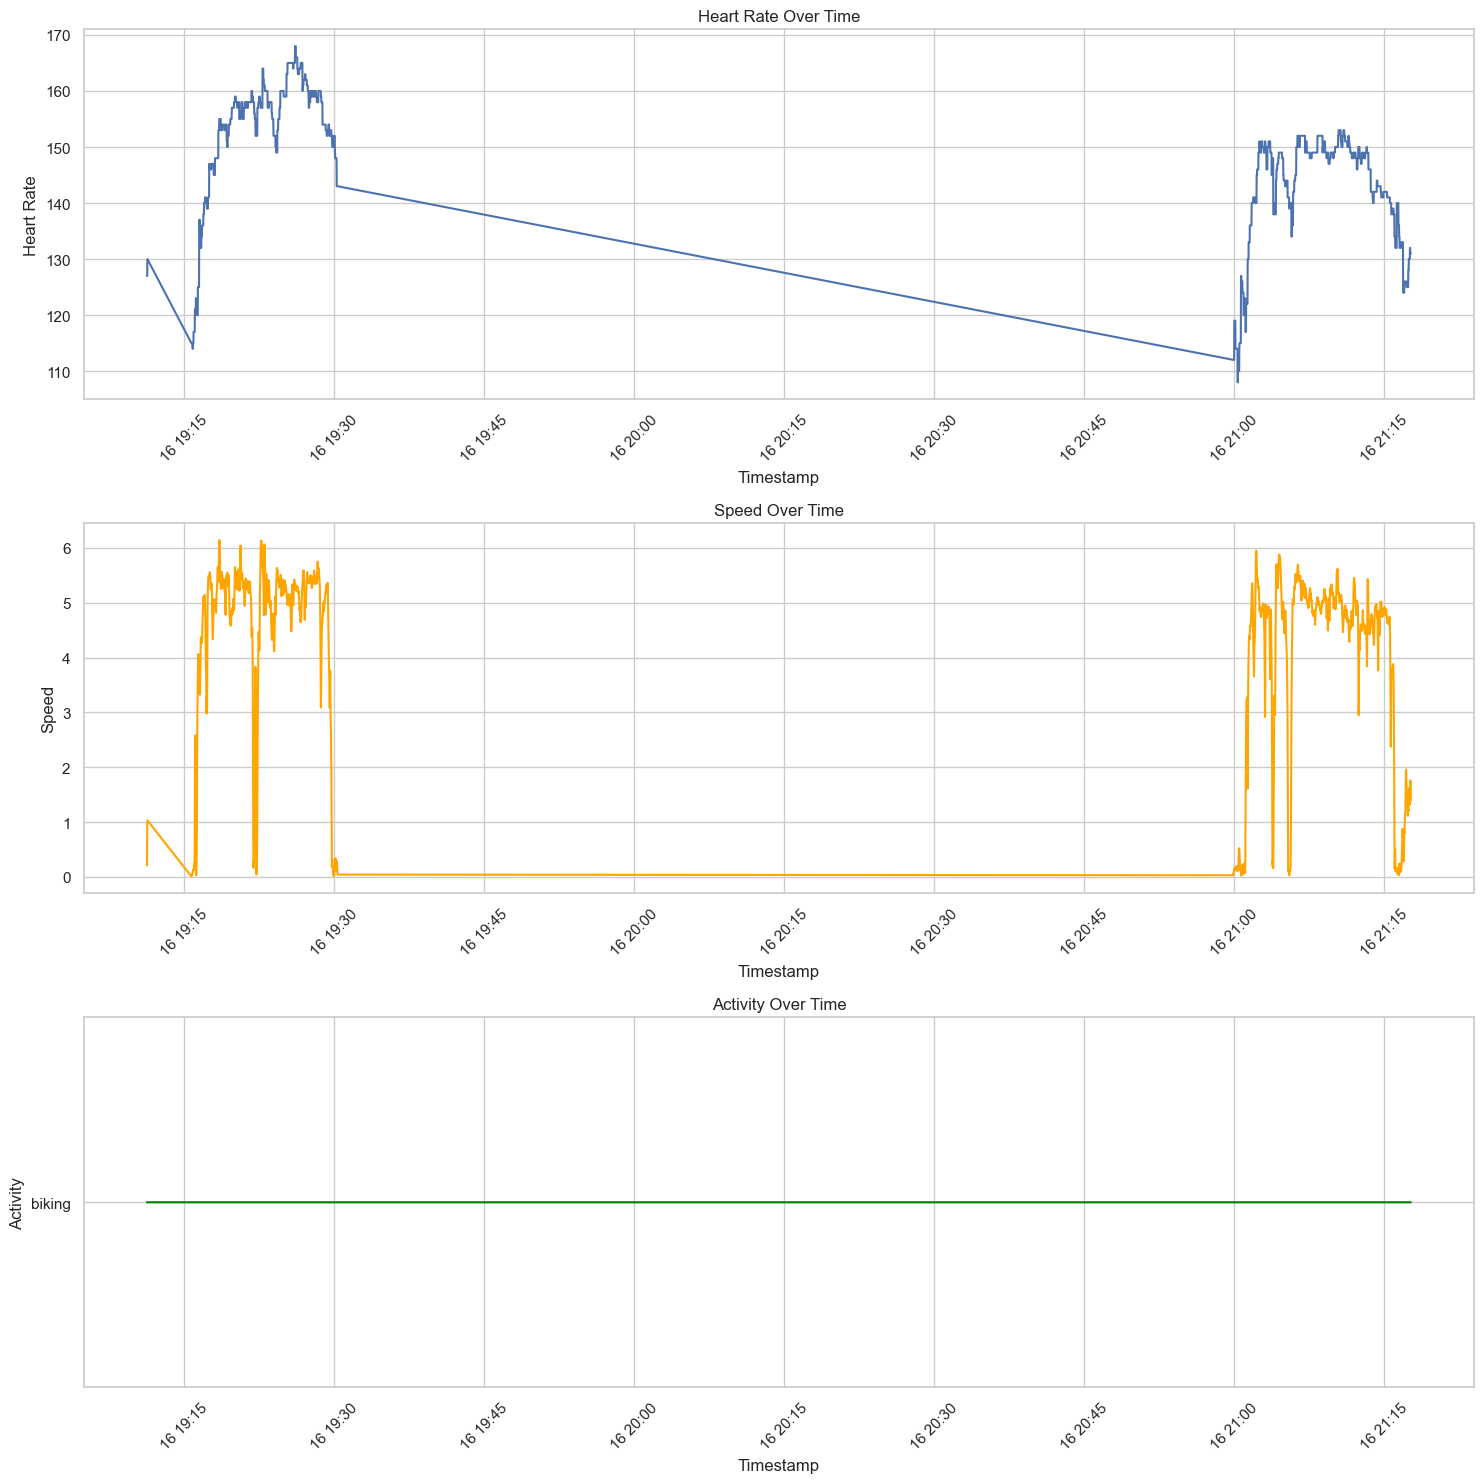

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Timestamp' is the column with datetime information
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Filter data for a specific day, for example, April 12, 2024
start_date = '2024-05-16'
end_date = '2024-05-17'  # The end_date is exclusive, so it filters until the end of April 12

filtered_data = data[(data['Timestamp'] >= start_date) & (data['Timestamp'] < end_date)]

plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.plot(filtered_data['Timestamp'], filtered_data['HeartRate'], label='Heart Rate')
plt.xlabel('Timestamp')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Over Time')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.plot(filtered_data['Timestamp'], filtered_data['Speed'], label='Speed', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Speed')
plt.title('Speed Over Time')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
plt.plot(filtered_data['Timestamp'], filtered_data['Activity'], label='Activity', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Activity')
plt.title('Activity Over Time')
plt.xticks(rotation=45)

plt.tight_layout()
file_name = f"graphs/timeSeriesOfData_single_day.png"
plt.savefig(file_name)
plt.show()


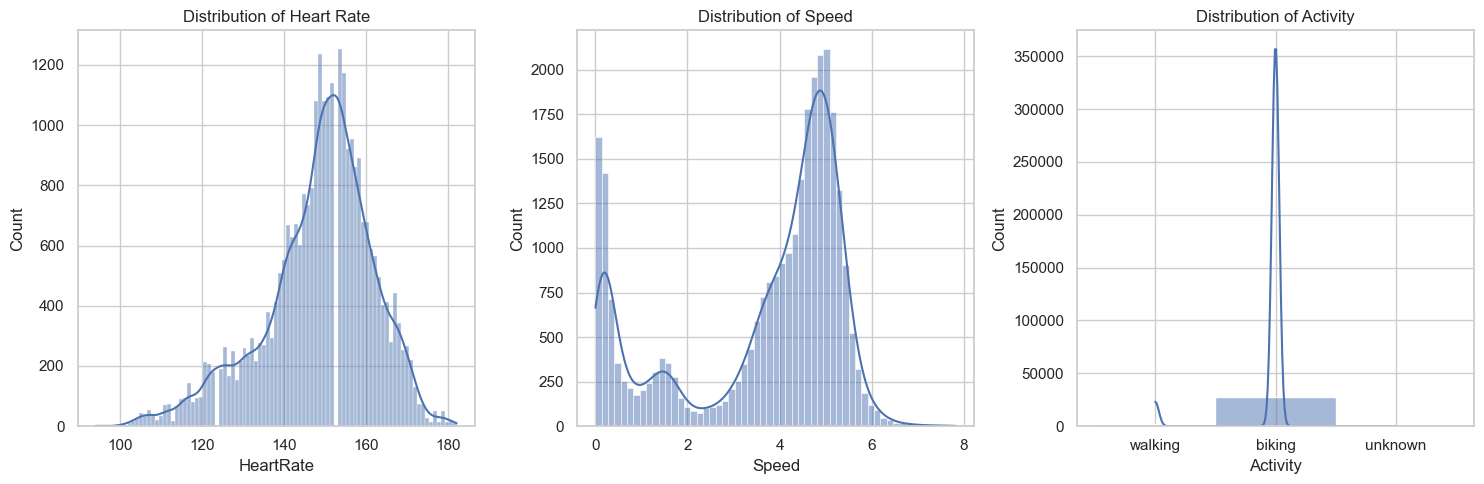

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['HeartRate'], kde=True)
plt.title('Distribution of Heart Rate')

plt.subplot(1, 3, 2)
sns.histplot(data['Speed'], kde=True)
plt.title('Distribution of Speed')

plt.subplot(1, 3, 3)
sns.histplot(data['Activity'], kde=True)
plt.title('Distribution of Activity')

plt.tight_layout()
file_name = f"graphs/distOfData.png"
plt.savefig(file_name)
plt.show()


In [94]:
plt.plot(data.Timestamp,data.HeartRate)
plt.xlabel('Timestamp')
plt.ylabel('Heart rate')
plt.title('Heart rate over time plot')
file_name = f"graphs/heartRateOverTime.png"
plt.savefig(file_name)

plt.clf()


<Figure size 640x480 with 0 Axes>

In [97]:
# Ratio per activies summary
for activity in set(data['Activity'].tolist()):
    print(f"{activity} entries: {data['Activity'].value_counts()[activity]}")

running
running entries: 1
biking
biking entries: 35224
walking
walking entries: 250780


In [55]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year/Week'] = data['Timestamp'].apply(lambda x: "%d/%d" % (x.year, x.week))
data.head()
pd.options.display.width = 0
f = open("groupedActivity.txt", "w")
f.write(data.groupby(['Year/Week', 'Activity']).size().to_string())
f.close()


                   Latitude  Longitude  Elevation     Speed    Course  \
Latitude           1.000000  -0.997872  -0.599813  0.100172 -0.097269   
Longitude         -0.997872   1.000000   0.580576 -0.095906  0.104004   
Elevation         -0.599813   0.580576   1.000000 -0.050404 -0.058435   
Speed              0.100172  -0.095906  -0.050404  1.000000 -0.005385   
Course            -0.097269   0.104004  -0.058435 -0.005385  1.000000   
HeartRate         -0.232416   0.239340   0.165106  0.202064  0.055140   
duration           0.001629  -0.007536   0.100270 -0.177162 -0.022748   
totalEnergyBurned       NaN        NaN        NaN       NaN       NaN   

                   HeartRate  duration  totalEnergyBurned  
Latitude           -0.232416  0.001629                NaN  
Longitude           0.239340 -0.007536                NaN  
Elevation           0.165106  0.100270                NaN  
Speed               0.202064 -0.177162                NaN  
Course              0.055140 -0.022748    

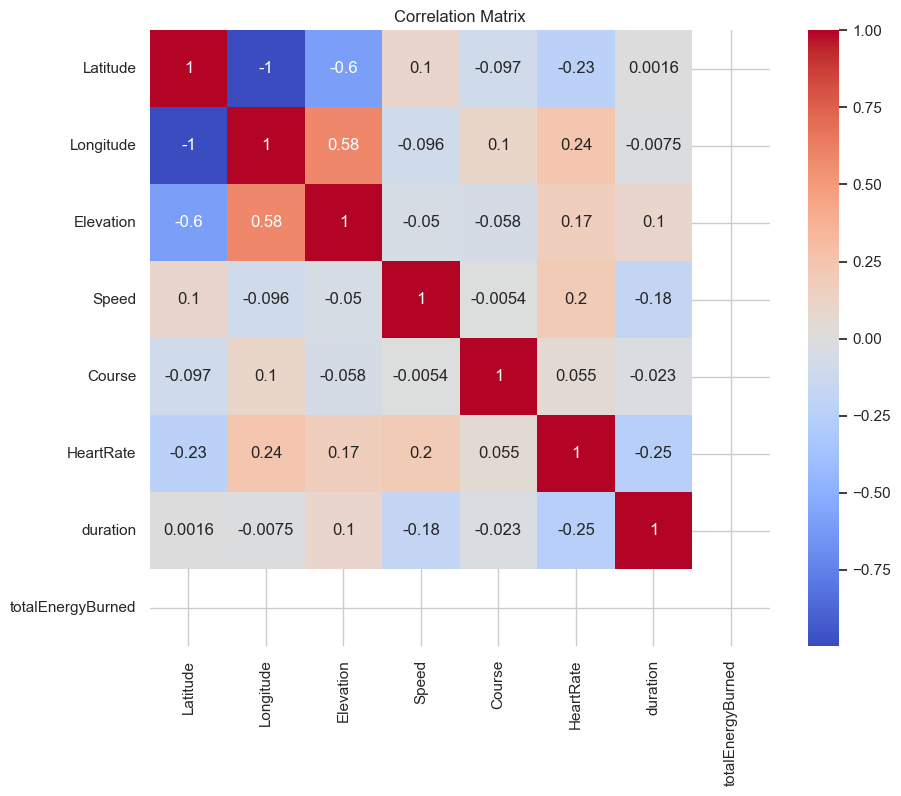

In [56]:
numeric_columns = ['Latitude', 'Longitude', 'Elevation', 'Speed', 'Course', 'HeartRate', 'duration', 'totalEnergyBurned']
correlation_matrix = data[numeric_columns].corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [57]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


Timestamp            0
Latitude             0
Longitude            0
Elevation            0
Speed                0
Course               0
HeartRate            0
duration             0
totalEnergyBurned    0
Activity             0
Year/Week            0
dtype: int64


In [58]:
data['HeartRate'].fillna(data['HeartRate'].mean(), inplace=True)
data['Speed'].fillna(data['Speed'].mean(), inplace=True)
data['Elevation'].fillna(data['Elevation'].mean(), inplace=True)


In [59]:
data.dropna(thresh=len(data.columns) - 2, inplace=True)


In [60]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

In [61]:
data = remove_outliers(data, 'HeartRate')
data = remove_outliers(data, 'Speed')

In [62]:
data = remove_outliers(data, 'Course')

In [63]:
summary = data.describe()
print(summary)

            Latitude      Longitude      Elevation          Speed  \
count  256281.000000  256281.000000  256281.000000  256281.000000   
mean       45.464098      14.077053      24.923701       1.067522   
std         6.778494       9.231667      45.005898       0.511063   
min        37.969378       3.563862     -66.629044       0.000000   
25%        39.350756       4.869284       0.492327       0.786512   
50%        40.059767      20.704828       3.753202       1.205112   
75%        52.325066      22.957946      11.531688       1.410213   
max        52.393409      24.013424     216.605615       2.399992   

              Course      HeartRate       duration  totalEnergyBurned  
count  256281.000000  256281.000000  256281.000000           256281.0  
mean      186.056351     112.397421      61.161673                0.0  
std       100.677242      10.950048      34.435577                0.0  
min        -1.000000      80.000000       4.492327                0.0  
25%       106.0251

In [64]:
data.drop(columns=['totalEnergyBurned'], inplace=True)

In [65]:
data.head(100)

,Timestamp,Latitude,Longitude,Elevation,Speed,Course,HeartRate,duration,Activity,Year/Week
359686,2023-06-01 09:09:06+00:00,37.986286,23.909945,120.607999,1.629446,206.381492,109.000,43.262739,walking,2023/22
359687,2023-06-01 09:09:07+00:00,37.986273,23.909938,120.712788,1.560308,205.855530,109.000,43.262739,walking,2023/22
359688,2023-06-01 09:09:08+00:00,37.986261,23.909930,120.800310,1.390064,207.366817,117.718,43.262739,walking,2023/22
359689,2023-06-01 09:09:09+00:00,37.986250,23.909923,120.873467,1.413677,201.764140,117.718,43.262739,walking,2023/22
359690,2023-06-01 09:09:10+00:00,37.986237,23.909917,120.936883,1.455680,199.097956,117.718,43.262739,walking,2023/22
...,...,...,...,...,...,...,...,...,...,...
359788,2023-06-01 09:10:47+00:00,37.985765,23.910610,120.554329,1.513851,41.412356,117.718,43.262739,walking,2023/22
359789,2023-06-01 09:10:48+00:00,37.985778,23.910621,120.516646,1.805767,32.636343,117.718,43.262739,walking,2023/22
359790,2023-06-01 09:10:49+00:00,37.985792,23.910633,120.495201,2.014026,30.469335,117.718,43.262739,walking,2023/22
359791,2023-06-01 09:10:50+00:00,37.985806,23.910643,120.486322,1.575084,32.928206,117.718,43.262739,walking,2023/22


Latitude
Longitude
Elevation
Speed
Course
HeartRate
duration
Latitude        0
Longitude       0
Elevation    2954
Speed           0
Course          0
HeartRate       0
duration        0
dtype: int64
Total number of outliers in training set: 2954 (1.15%)


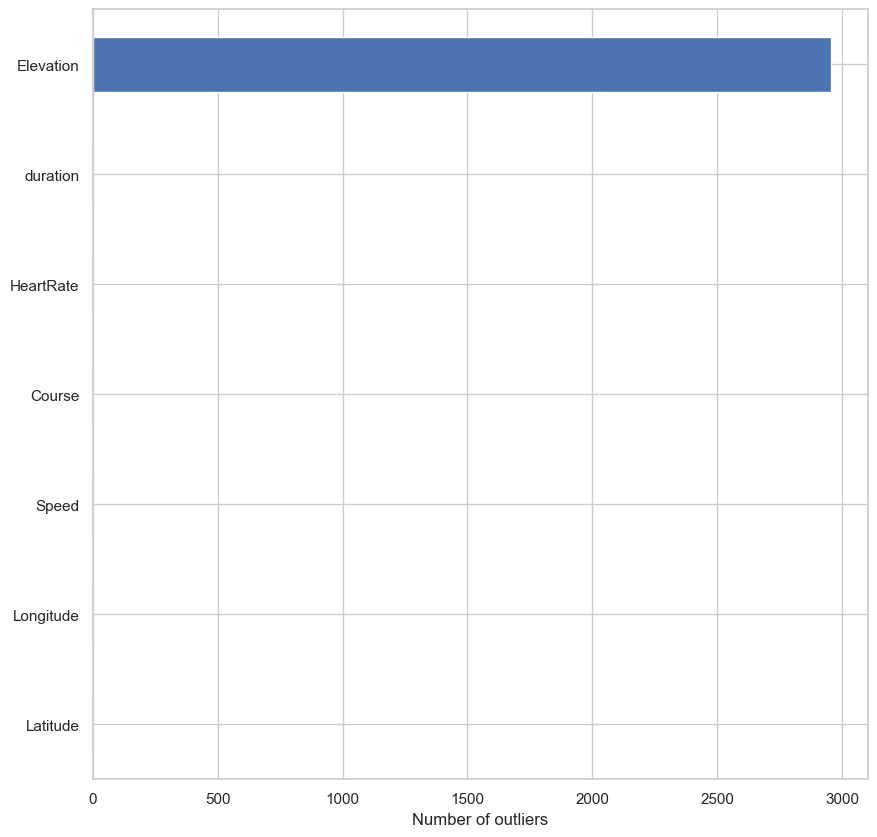

In [85]:
from scipy.special import erfc


argDropList = ['Timestamp', 'Year/Week', 'Activity']
for arg in argDropList:
    if arg in data.columns:
        data.drop(arg)
    
def chauvenet(array):
    mean = array.mean()
    stdv = array.std()
    N = len(array)
    criterion = 1.0/(2*N) # Chauvenet's criterion
    d = abs(array-mean)/stdv
    prob = erfc(d)  
    return prob < criterion

train_outliers = dict()
for col in data.columns:
    print(col)
    train_outliers[col] = data[chauvenet(data[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

print(train_outliers)

train_outliers.sort_values().plot(figsize=(10, 10), kind='barh').set_xlabel('Number of outliers')

print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / data.shape[0]) * 100))

NameError: name '_df_10' is not defined

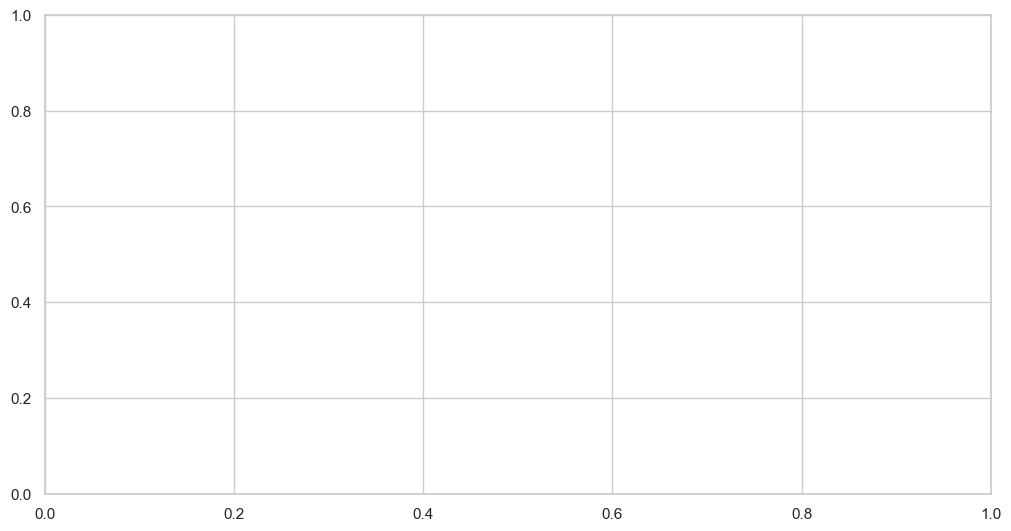

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['HeartRate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('HeartRate')

In [ ]:
unique_activities = data['Activity'].unique()

In [ ]:
unique_activities

array(['biking', 'unknown', 'walking'], dtype=object)